# Jupyter (IPython) Advanced Features
---

Outline
- Keyboard shortcuts
- Magic
- Accessing the underlying operating system
- File magic
- Using Jupyter more efficiently
- Profiling
- Using different languages inside single notebook
- Output
- Automation
- Extensions
- 'Big Data' Analysis
    

Sources: [IPython Tutorial](https://github.com/ipython/ipython-in-depth/blob/pycon-2019/1%20-%20Beyond%20Plain%20Python.ipynb), [Dataquest](https://www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial/), and [Dataquest](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/), [Alex Rogozhnikov Blog](http://arogozhnikov.github.io/2016/09/10/jupyter-features.html) [Toward Data Science](https://towardsdatascience.com/how-to-effortlessly-optimize-jupyter-notebooks-e864162a06ee)

---

## Keyboard Shortcuts


Keyboard Shortcuts

As in the classic Notebook, you can navigate the user interface through keyboard shortcuts. You can find and customize the current list of keyboard shortcuts by selecting the Advanced Settings Editor item in the Settings menu, then selecting Keyboard Shortcuts in the Settings tab.

### Shortcut Keys for Jupyter lab

While working with any tools, it helps if you know shortcut key to perform most frequent tasks. It increases your productivity and can be very comfortable while working. I have listed down some of the shortcuts which I use frequently while working on Jupyter Lab. Hopefully, it will be useful for others too. Also, you can check full list of shortcut by accessing the __commands tab__ in the Jupyter lab. You will find it below the Files on the left hand side.

1.  **ESC** takes users into command mode view while **ENTER** takes users into cell mode view.
2.  **A** inserts a cell above the currently selected cell. Before using this, make sure that you are in command mode (by pressing ESC).
3.  **B** inserts a cell below the currently selected cell. Before using this make sure that you are in command mode (by pressing ESC).
4.  **D + D** = Pressing D two times in a quick succession in command mode deletes the currently selected cell. 
5.  Jupyter Lab gives you an option to change your cell into Code cell, Markdown cell or Raw Cell. You can use **M** to change current cell to a markdown cell, **Y** to change it to a code cell and  **R** to change it to a raw cell.
6.  ****CTRL + B**** = Jupyter lab has two columns design. One column is for launcher or code blocks and another column is for file view etc. To increase workspace while writing code, we can close it.  **CTRL + B** is the shortcut for toggling the file view column in the Jupyter lab.
7.  **SHIFT + M** = It merges multiple selected cells into one cell. 
8.  **CTRL + SHIFT + –** = It splits the current cell into two cells from where your cursor is.
9.  **SHIFT+J** or **SHIFT + DOWN** = It selects the next cell in a downward direction.  It will help in making multiple selections of cells.
10.  **SHIFT + K** or **SHIFT + UP** = It selects the next cell in an upwards direction. It will help in making multiple selections of cells.
11.  **CTRL +** / = It helps you in either commenting or uncommenting any line in the Jupyter lab. For this to work, you don’t even need to select the whole line. It will comment or uncomment line where your cursor is. If you want to do it for more that one line then you will need to first select all the line and then use this shortcut.

A PDF!!!
- https://blog.ja-ke.tech/2019/01/20/jupyterlab-shortcuts.html
- https://github.com/Jakeler/jupyter-shortcuts

## Magics

---

Magics are turning simple python into *magical python*. Magics are the key to power of ipython.

Magic functions are prefixed by % or %%, and typically take their arguments without parentheses, quotes or even commas for convenience.  Line magics take a single % and cell magics are prefixed with two %%.

#### What is Magic??? Information about IPython's 'magic' % functions.

In [1]:
%magic


IPython's 'magic' functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features. There are two kinds of magics, line-oriented and cell-oriented.

Line magics are prefixed with the % character and work much like OS
command-line calls: they get as an argument the rest of the line, where
arguments are passed without parentheses or quotes.  For example, this will
time the given statement::

        %timeit range(1000)

Cell magics are prefixed with a double %%, and they are functions that get as
an argument not only the rest of the line, but also the lines below it in a
separate argument.  These magics are called with two arguments: the rest of the
call line and the body of the cell, consisting of the lines below the first.
For example::

        %%timeit x = numpy.random.randn((100, 100))
        numpy.linalg.svd(x)

will time the execution of the numpy svd routine, running the assignment 

#### List available python magics

In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

#### %env
You can manage environment variables of your notebook without restarting the jupyter server process. Some libraries (like theano) use environment variables to control behavior, %env is the most convenient way.

In [3]:
# %env - without arguments lists environmental variables
%env OMP_NUM_THREADS=4

env: OMP_NUM_THREADS=4


# Accessing the underlying operating system

---

## Executing shell commands

You can call any shell command. This in particular useful to manage your virtual environment.

In [4]:
!pip install numpy

In [5]:
!pip list | grep Theano

## Adding packages can also be done using...

%conda install numpy

%pip install numpy

will attempt to install packages in the current environment.

In [6]:
!pwd

/Users/squiresrb/Documents/GitHub/jupyter_training/notebooks/2-Jupyter


In [7]:
%pwd

'/Users/squiresrb/Documents/GitHub/jupyter_training/notebooks/2-Jupyter'

In [8]:
pwd

'/Users/squiresrb/Documents/GitHub/jupyter_training/notebooks/2-Jupyter'

In [9]:
files = !ls .
print("files in notebooks directory:")
print(files)

files in notebooks directory:
['2-1-Jupyter-ecosystem.ipynb', '2-10-jupyter-code-script-of-scripts.ipynb', '2-11-Advanced-jupyter.ipynb', '2-2-jupyter-architecture.ipynb', '2-3-jupyter-notebook-basics.ipynb', '2-4-jupyter-markdown.ipynb', '2-5-jupyter-code-python.ipynb', '2-6-jupyter-code-r.ipynb', '2-7-jupyter-command-line.ipynb', '2-8-jupyter-magics.ipynb', '2-9-jupyter-sharing', '2-Jupyter-help.ipynb', 'Untitled.ipynb', 'big-data-analysis-jupyter.ipynb', 'foo.py', 'images', 'jupyter-advanced.ipynb']


In [10]:
!echo $files

[2-1-Jupyter-ecosystem.ipynb, 2-10-jupyter-code-script-of-scripts.ipynb, 2-11-Advanced-jupyter.ipynb, 2-2-jupyter-architecture.ipynb, 2-3-jupyter-notebook-basics.ipynb, 2-4-jupyter-markdown.ipynb, 2-5-jupyter-code-python.ipynb, 2-6-jupyter-code-r.ipynb, 2-7-jupyter-command-line.ipynb, 2-8-jupyter-magics.ipynb, 2-9-jupyter-sharing, 2-Jupyter-help.ipynb, Untitled.ipynb, big-data-analysis-jupyter.ipynb, foo.py, images, jupyter-advanced.ipynb]


In [11]:
!echo {files[0].upper()}

2-1-JUPYTER-ECOSYSTEM.IPYNB


Note that all this is available even in multiline blocks:

In [12]:
import os
for i,f in enumerate(files):
    if f.endswith('ipynb'):
        !echo {"%02d" % i} - "{os.path.splitext(f)[0]}"
    else:
        print('--')

00 - 2-1-Jupyter-ecosystem
01 - 2-10-jupyter-code-script-of-scripts
02 - 2-11-Advanced-jupyter
03 - 2-2-jupyter-architecture
04 - 2-3-jupyter-notebook-basics
05 - 2-4-jupyter-markdown
06 - 2-5-jupyter-code-python
07 - 2-6-jupyter-code-r
08 - 2-7-jupyter-command-line
09 - 2-8-jupyter-magics
--
11 - 2-Jupyter-help
12 - Untitled
13 - big-data-analysis-jupyter
--
--
16 - jupyter-advanced


## I could take the same list with a bash command

because magics and bash calls return python variables:

In [13]:
names = !ls ../images/ml_demonstrations/*.png
names[:5]

['ls: ../images/ml_demonstrations/*.png: No such file or directory']

## Suppress output of last line

sometimes output isn't needed, so we can either use `pass` instruction on new line or semicolon at the end 

%conda install matplotlib

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy

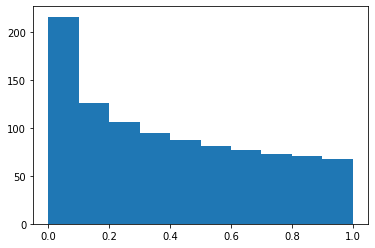

In [17]:
# if you don't put semicolon at the end, you'll have output of function printed

plt.hist(numpy.linspace(0, 1, 1000)**1.5);

# File magic

%%writefile Export the contents of a cell

In [18]:
%%writefile?

Docstring:
::

  %writefile [-a] filename

Write the contents of the cell to a file.

The file will be overwritten unless the -a (--append) flag is specified.

positional arguments:
  filename      file to write

optional arguments:
  -a, --append  Append contents of the cell to an existing file. The file will
                be created if it does not exist.
File:      ~/opt/anaconda3/envs/Python-R/lib/python3.7/site-packages/IPython/core/magics/osm.py


`%pycat` ill output in the pop-up window:
```
Show a syntax-highlighted file through a pager.

This magic is similar to the cat utility, but it will assume the file
to be Python source and will show it with syntax highlighting.

This magic command can either take a local filename, an url,
an history range (see %history) or a macro as argument ::

%pycat myscript.py
%pycat 7-27
%pycat myMacro
%pycat http://www.example.com/myscript.py
```

## %load 
loading code directly into cell. You can pick local file or file on the web.

After uncommenting the code below and executing, it will replace the content of cell with contents of file.


In [19]:
# %load http://matplotlib.org/mpl_examples/pylab_examples/contour_demo.py

## %run to execute python code

%run can execute python code from .py files &mdash; this is a well-documented behavior. 

But it also can execute other jupyter notebooks! Sometimes it is quite useful.

NB. %run is not the same as importing python module.

In [20]:
# this will execute all the code cells from different notebooks
%run ./2015-09-29-NumpyTipsAndTricks1.ipynb

ERROR:root:File `'./2015-09-29-NumpyTipsAndTricks1.ipynb.py'` not found.


# Using Jupyter more efficiently

---

## Store Magic - %store: lazy passing data between notebooks

%store lets you store your macro and use it across all of your Jupyter Notebooks.

In [21]:
data = 'this is the string I want to pass to different notebook'
%store data
del data # deleted variable

Stored 'data' (str)


In [23]:
# in second notebook I will use:
%store -r data
print(data)

this is the string I want to pass to different notebook


## %who: analyze variables of global scope

In [24]:
%whos

Variable   Type      Data/Info
------------------------------
data       str       this is the string I want<...>ass to different notebook
f          str       jupyter-advanced.ipynb
files      SList     ['2-1-Jupyter-ecosystem.i<...>'jupyter-advanced.ipynb']
i          int       16
names      SList     ['ls: ../images/ml_demons<...> such file or directory']
numpy      module    <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
os         module    <module 'os' from '/Users<...>n-R/lib/python3.7/os.py'>
plt        module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


In [25]:
# pring names of string variables
%who str

data	 f	 


## Multiple cursors

Since recently jupyter supports multiple cursors (in a single cell), just like sublime ot intelliJ! __Alt + mouse selection__ for multiline selection and __Ctrl + mouse clicks__ for multicursors.

<img src='./images/jupyter/multi-cursor.gif' />

Gif taken from http://swanintelligence.com/multi-cursor-in-jupyter.html

## Timing 

When you need to measure time spent or find the bottleneck in the code, ipython comes to the rescue.

%%time
import time
time.sleep(2) # sleep for two seconds

In [26]:
# measure small code snippets with timeit !
import numpy
%timeit numpy.random.normal(size=100)

6.45 µs ± 176 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [27]:
%%writefile pythoncode.py

import numpy
def append_if_not_exists(arr, x):
    if x not in arr:
        arr.append(x)
        
def some_useless_slow_function():
    arr = list()
    for i in range(10000):
        x = numpy.random.randint(0, 10000)
        append_if_not_exists(arr, x)

Writing pythoncode.py


In [28]:
# shows highlighted source of the newly-created file
%pycat pythoncode.py


import numpy
def append_if_not_exists(arr, x):
    if x not in arr:
        arr.append(x)
        
def some_useless_slow_function():
    arr = list()
    for i in range(10000):
        x = numpy.random.randint(0, 10000)
        append_if_not_exists(arr, x)


In [29]:
from pythoncode import some_useless_slow_function, append_if_not_exists

## Hiding code or output

- Click on the blue vertical bar or line to the left to collapse code or output

## Commenting and uncommenting a block of code

You might want to add new lines of code and comment out the old lines while you’re working. This is great if you’re improving the performance of your code or trying to debug it.
- First, select all the lines you want to comment out.
- Next hit cmd + / to comment out the highlighted code!

## Pretty Print all cell outputs

Normally only the last output in the cell will be printed. For everything else, you have to manually add print(), which is fine but not super convenient. You can change that by adding this at the top of the notebook:

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Profiling: %prun, %lprun, %mprun
---

See a much longer explination of profiling and timeing in Jake Vanderplas' Python Data Science Handbook: 
https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html

In [31]:
# shows how much time program spent in each function
%prun some_useless_slow_function()

         96319 function calls in 0.368 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.276    0.000    0.277    0.000 pythoncode.py:3(append_if_not_exists)
    10000    0.052    0.000    0.083    0.000 {method 'randint' of 'numpy.random.mtrand.RandomState' objects}
    10000    0.011    0.000    0.031    0.000 _dtype.py:319(_name_get)
    10000    0.008    0.000    0.020    0.000 numerictypes.py:365(issubdtype)
        1    0.007    0.007    0.368    0.368 pythoncode.py:7(some_useless_slow_function)
    20000    0.007    0.000    0.011    0.000 numerictypes.py:293(issubclass_)
    30000    0.005    0.000    0.005    0.000 {built-in method builtins.issubclass}
     6315    0.001    0.000    0.001    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.368    0.368 <string>:1(<module>)
        1    0.000    0.000    0.368    0.368 {built-in method builtins.exec}
        1    0.000    0.000

Example of output:
```
26338 function calls in 0.713 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.684    0.000    0.685    0.000 pythoncode.py:3(append_if_not_exists)
    10000    0.014    0.000    0.014    0.000 {method 'randint' of 'mtrand.RandomState' objects}
        1    0.011    0.011    0.713    0.713 pythoncode.py:7(some_useless_slow_function)
        1    0.003    0.003    0.003    0.003 {range}
     6334    0.001    0.000    0.001    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.713    0.713 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

In [33]:
# %load_ext memory_profiler ???

In [ ]:
To profile memory, you can install and run pmrun

# %pip install memory_profiler
# %pip install line_profiler

In [35]:
# tracking memory consumption (show in the pop-up)
# %mprun -f append_if_not_exists some_useless_slow_function()

Example of output:
```
Line #    Mem usage    Increment   Line Contents
================================================
     3     20.6 MiB      0.0 MiB   def append_if_not_exists(arr, x):
     4     20.6 MiB      0.0 MiB       if x not in arr:
     5     20.6 MiB      0.0 MiB           arr.append(x)
```

**%lprun** is line profiling, but it seems to be broken for latest IPython release, so we'll manage without magic this time:

```python
import line_profiler
lp = line_profiler.LineProfiler()
lp.add_function(some_useless_slow_function)
lp.runctx('some_useless_slow_function()', locals=locals(), globals=globals())
lp.print_stats()
```

## Debugging with %debug

Jupyter has own interface for [ipdb](https://docs.python.org/2/library/pdb.html). Makes it possible to go inside the function and investigate what happens there.

This is not pycharm and requires much time to adapt, but when debugging on the server this can be the only option (or use pdb from terminal).

In [37]:
#%%debug filename:line_number_for_breakpoint
# Here some code that fails. This will activate interactive context for debugging

A bit easier option is `%pdb`, which activates debugger when exception is raised:

In [38]:
# %pdb

# def pick_and_take():
#     picked = numpy.random.randint(0, 1000)
#     raise NotImplementedError()
    
# pick_and_take()

# Using different languages inside single notebook

---

If you're missing those much, using other computational kernels:

- %%python2
- %%python3
- %%ruby
- %%perl
- %%bash
- %%R

is possible, but obviously you'll need to setup the corresponding kernel first.

In [39]:
%%ruby
puts 'Hi, this is ruby.'

Hi, this is ruby.


In [40]:
%%bash
echo 'Hi, this is bash.'

Hi, this is bash.


## Running R code in Jupyter notebook

#### Installing R kernel

Easy Option: Installing the R Kernel Using Anaconda
If you used Anaconda to set up your environment, getting R working is extremely easy. Just run the below in your terminal:

In [41]:
# %conda install -c r r-essentials

#### Running R and Python in the same notebook.

The best solution to this is to install rpy2 (requires a working version of R as well), which can be easily done with pip:

In [2]:
%pip install rpy2

Note: you may need to restart the kernel to use updated packages.


You can then use the two languages together, and even pass variables inbetween:

In [3]:
%load_ext rpy2.ipython

In [4]:
%R require(ggplot2)

R[write to console]: Loading required package: ggplot2

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



array([1], dtype=int32)

In [5]:
import pandas as pd
df = pd.DataFrame({
        'Letter': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
        'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
        'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
        'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]
    })

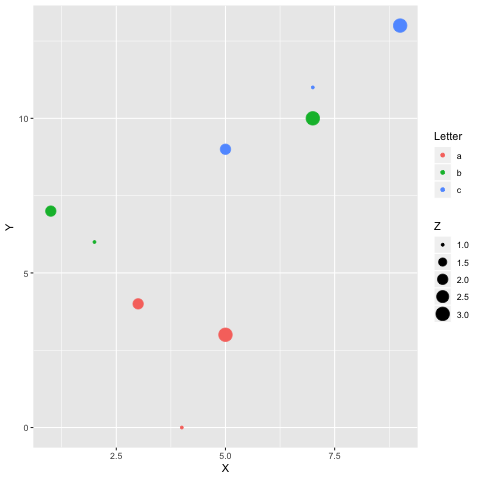

In [6]:
%%R -i df
ggplot(data = df) + geom_point(aes(x = X, y= Y, color = Letter, size = Z))

## Writing functions in cython or fortran

Sometimes the speed of numpy is not enough and I need to write some fast code. 
In principle, you can compile function in the dynamic library and write python wrappers...

But it is much better when this boring part is done for you, right?

You can write functions in cython or fortran and use those directly from python code.

First you'll need to install:
```
%pip install cython fortran-magic 
```

In [8]:
%pip install cython fortran-magic

     |████████████████████████████████| 2.9MB 2.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
%load_ext Cython

In [10]:
%%cython
def myltiply_by_2(float x):
    return 2.0 * x

In [11]:
myltiply_by_2(23.)

46.0

I also should mention that there are different jitter systems which can speed up your python code.
More examples in [my notebook](http://arogozhnikov.github.io/2015/09/08/SpeedBenchmarks.html). 


For more information see the IPython help at: [Cython](https://github.com/ipython/ipython-in-depth/blob/pycon-2019/6%20-%20Cross-Language-Integration.ipynb)

# Output
---

## [RISE](https://github.com/damianavila/RISE): presentations with notebook

Extension by Damian Avila makes it possible to show notebooks as demonstrations. Example of such presentation:   http://bollwyvl.github.io/live_reveal/#/7

It is very useful when you teach others e.g. to use some library.


## Jupyter output system

Notebooks are displayed as HTML and the cell output can be HTML, so you can return virtually anything: video/audio/images. 

In this example I scan the folder with images in my repository and show first five of them:

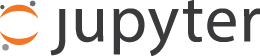

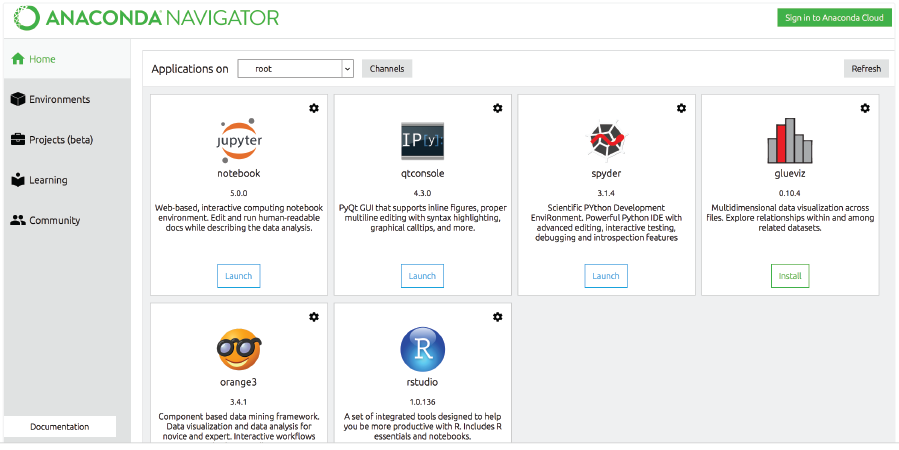

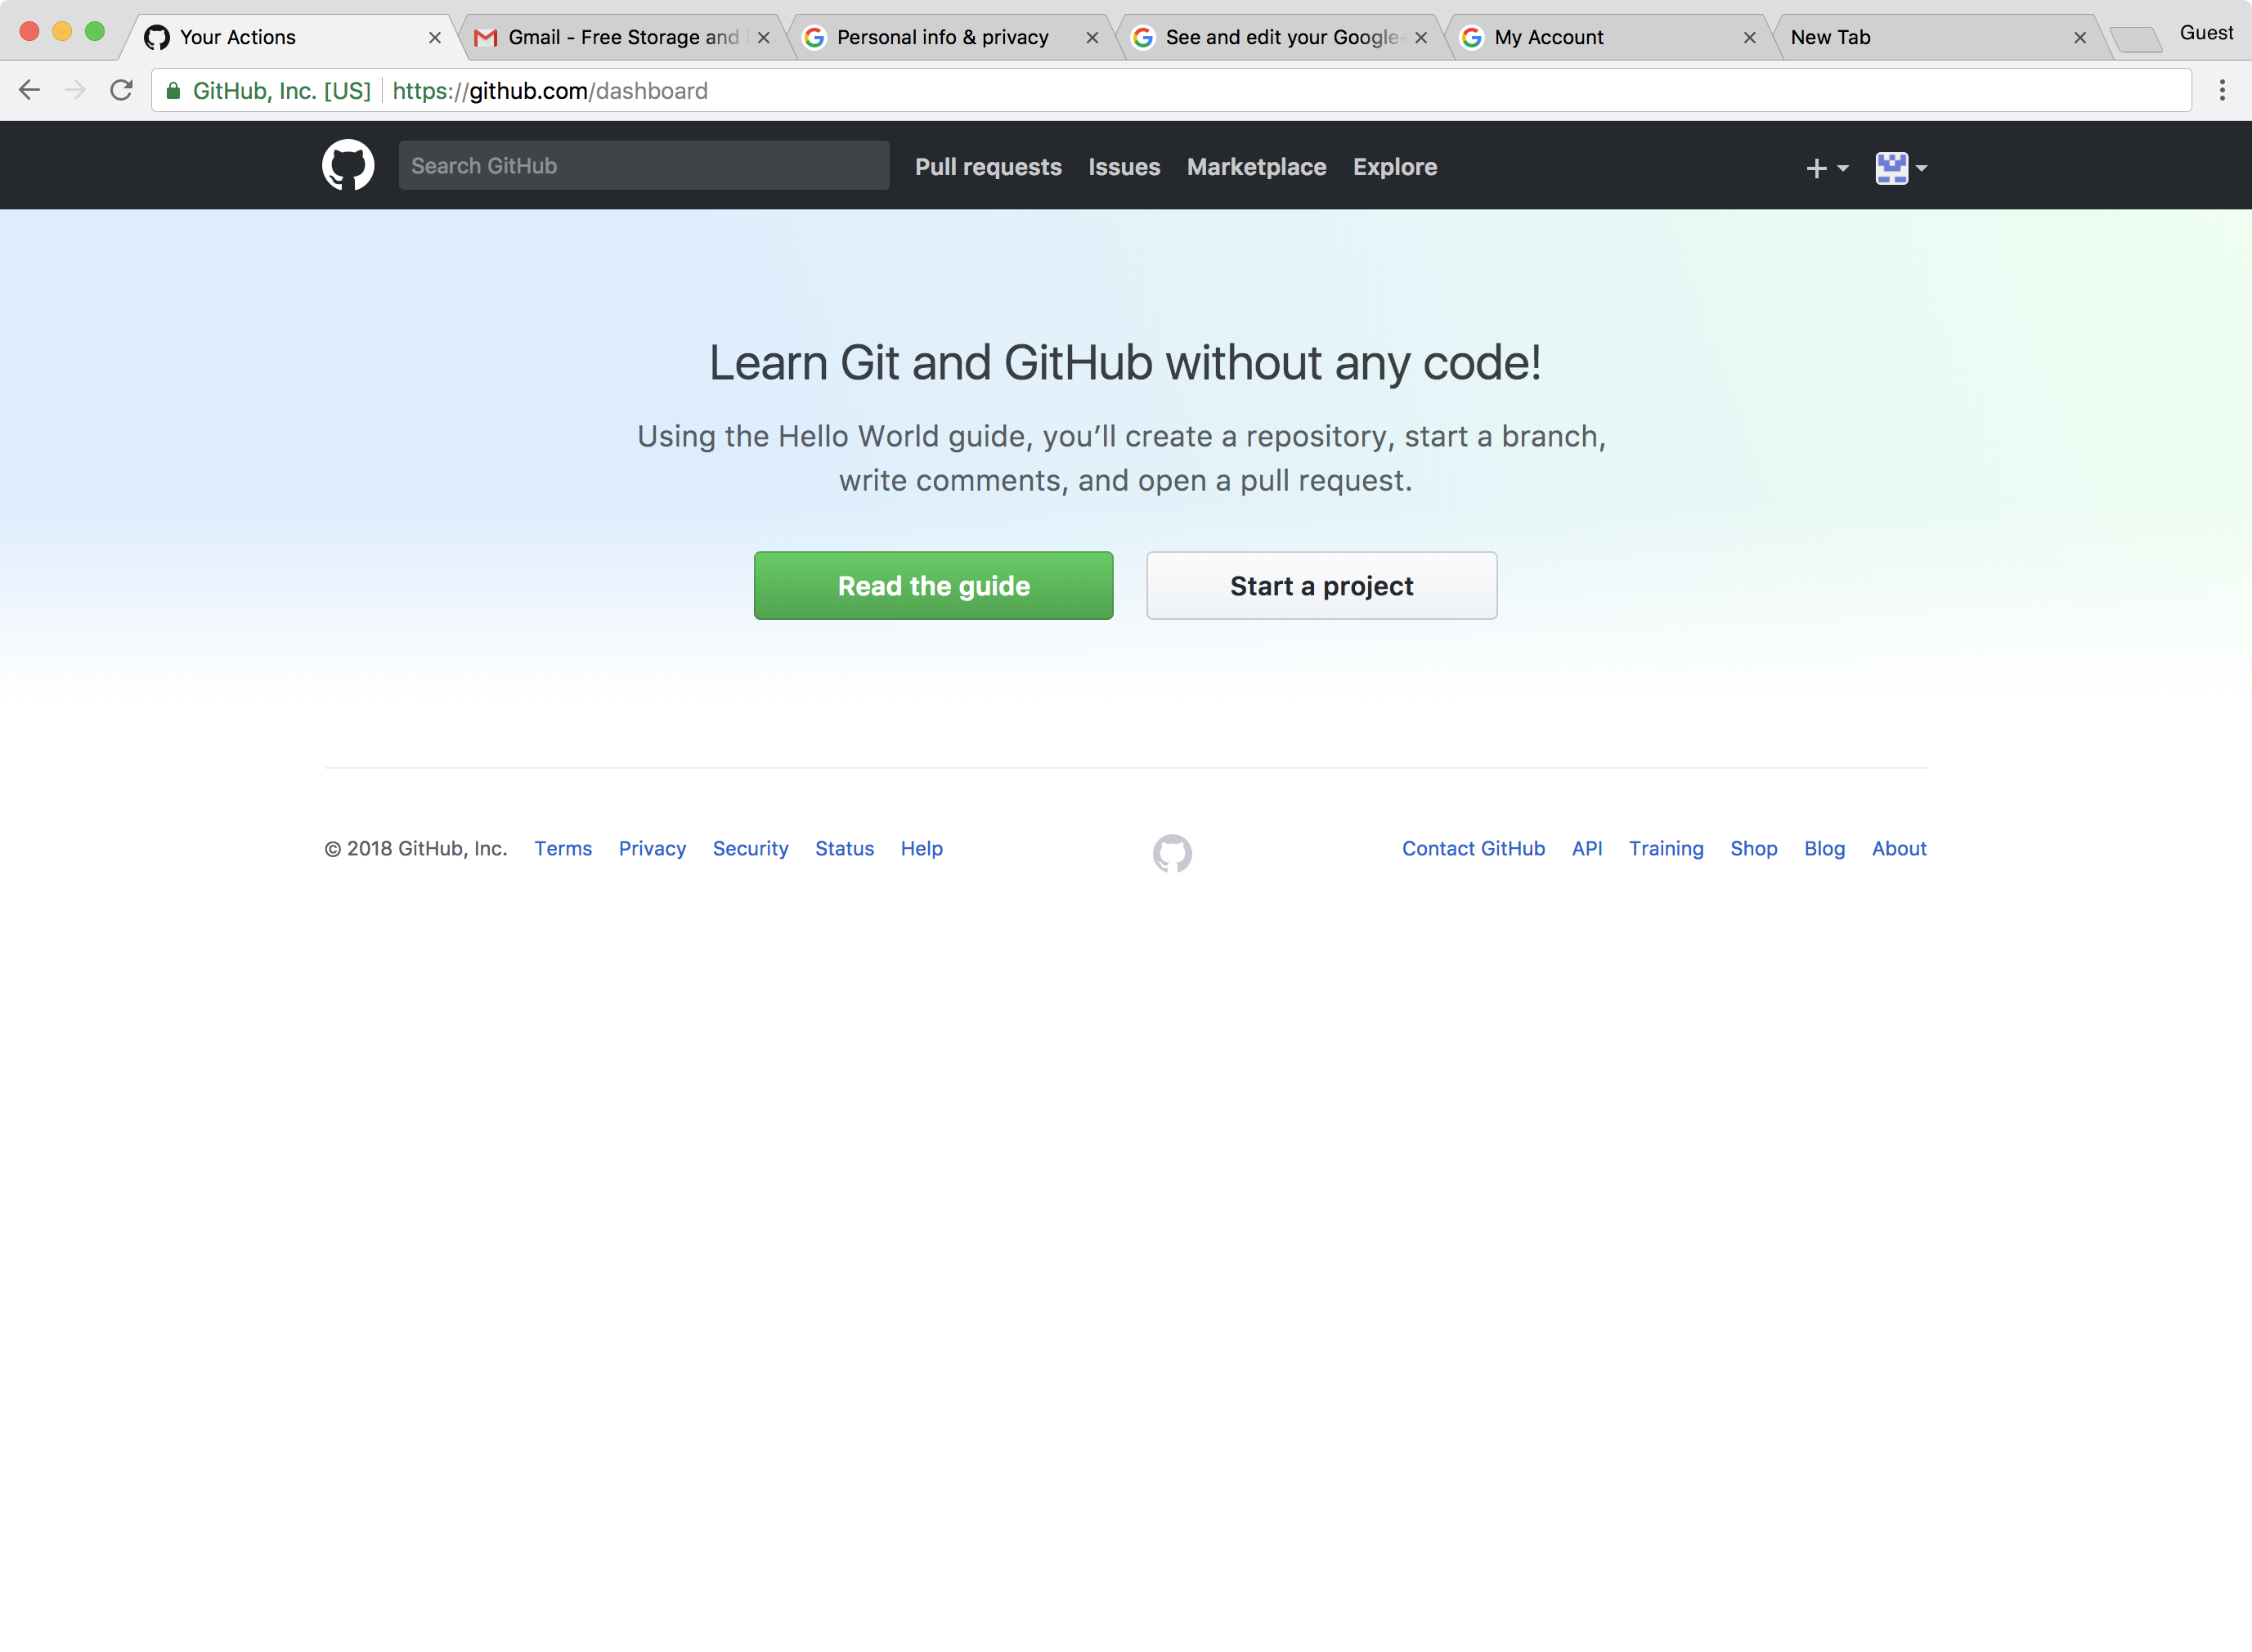

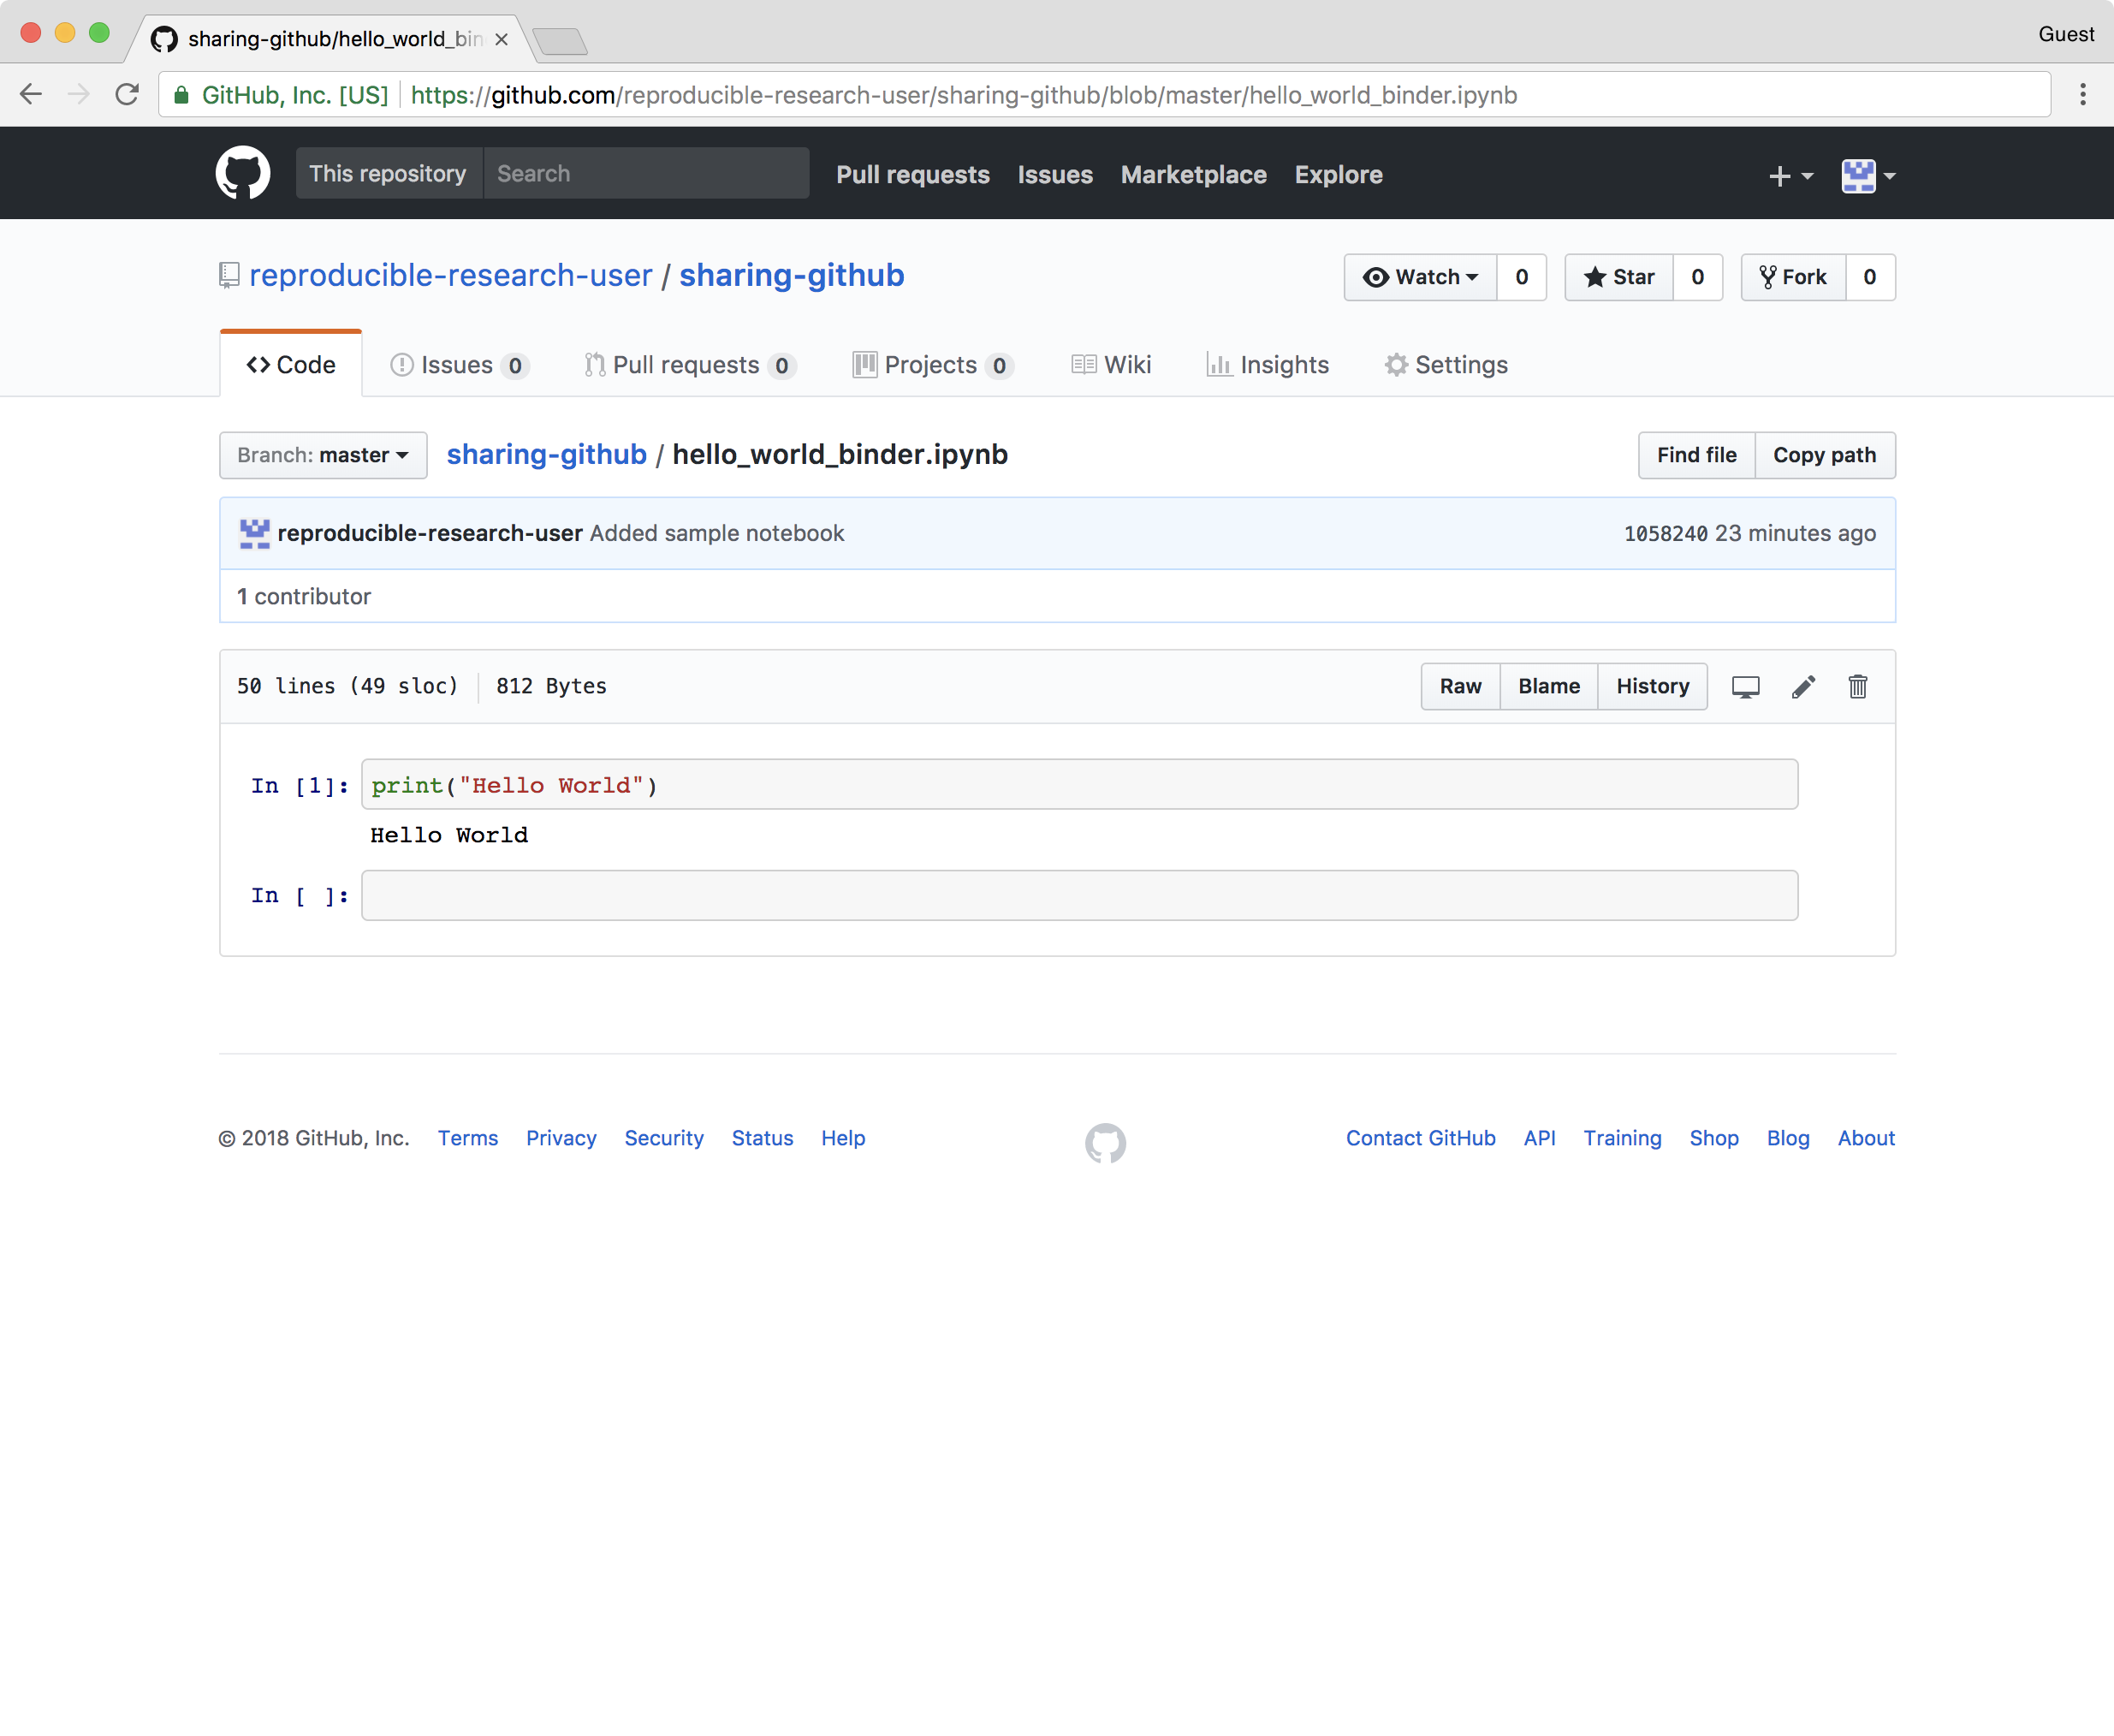

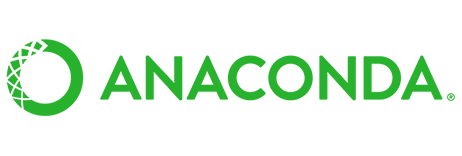

In [17]:
import os
from IPython.display import display, Image
names = [f for f in os.listdir('../images/') if f.endswith('.png')]
for name in names[:5]:
    display(Image('../images/' + name, width=300))

## Write your posts in notebooks

Like this one. Use `nbconvert` to export them to html.

# Notebook Automation
---

## Papermill

The basic idea is that you write a parameterized Jupyter notebook, essentially a notebook with parameters that get pasted into a new block at the top of the notebook. A system called Papermill metaprograms a bespoke notebook with provided parameters pasted in, and then executes the notebook with zero user interaction required. For Netflix, the benefit of this approach is to simplify the development and debugging of these scripts. If a particular job breaks, it’s trivial to pop open the offending notebook in the normal Jupyter environment, and it has all the data built in that it needs to execute until hitting the error.

http://willcrichton.net/notes/lessons-from-jupytercon/

Extensions
Source: https://towardsdatascience.com/how-to-effortlessly-optimize-jupyter-notebooks-e864162a06ee

# [Jupyter-contrib extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions)

are installed with 
```
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
!pip install jupyter_nbextensions_configurator
!jupyter contrib nbextension install --user
!jupyter nbextensions_configurator enable --user
```

<img src='./images/jupyter/nbextensions.png' />

this is a family of different extensions, including e.g. **jupyter spell-checker and code-formatter**, 
that are missing in jupyter by default. 

## Reconnect to kernel

Long before, when you started some long-taking process and at some point your connection to ipython server dropped, 
you completely lost the ability to track the computations process (unless you wrote this information to file). So either you interrupt the kernel and potentially lose some progress, or you wait till it completes without any idea of what is happening.

`Reconnect to kernel` option now makes it possible to connect again to running kernel without interrupting computations and get the newcoming output shown (but some part of output is already lost).

# Big data analysis

A number of solutions are available for querying/processing large data samples: 
- [ipyparallel (formerly ipython cluster)](https://github.com/ipython/ipyparallel) is a good option for simple map-reduce operations in python. We use it in [rep](github.com/yandex/rep) to train many machine learning models in parallel
- [pyspark](http://www.cloudera.com/documentation/enterprise/5-5-x/topics/spark_ipython.html)
- spark-sql magic [%%sql](https://github.com/jupyter-incubator/sparkmagic)

Additional Resources:

*   IPython [built-in magics](https://ipython.org/ipython-doc/3/interactive/magics.html)
*   Nice [interactive presentation about jupyter](http://quasiben.github.io/dfwmeetup_2014/#/) by Ben Zaitlen
*   Advanced notebooks [part 1: magics](https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/) and [part 2: widgets](https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/)
*   [Profiling in python with jupyter](http://pynash.org/2013/03/06/timing-and-profiling/)
*   [4 ways to extend notebooks](http://mindtrove.info/4-ways-to-extend-jupyter-notebook/)
*   [IPython notebook tricks](https://www.quora.com/What-are-your-favorite-tricks-for-IPython-Notebook)
*   [Jupyter vs Zeppelin for big data](https://www.linkedin.com/pulse/comprehensive-comparison-jupyter-vs-zeppelin-hoc-q-phan-mba-)
*   [Making publication ready Python notebooks](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook).
*   https://yoursdata.net/installing-and-configuring-jupyter-lab-on-windows/